In [18]:
# -*- coding: utf-8 -*-

import netCDF4 as nc4
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [19]:
dirt     = "/gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/"
dirt_omr = "/gpfswork/rech/omr/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/"
dirm = "/gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/MESHMASK/"

#List_ref = [48 , 0. ,dirt+"EXP_8_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"]
List_ref = [48 , 0. ,dirt_omr+"EXP_48_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"]
#List_ref = [48 , 45. ,dirt+"EXP_48_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"]
#List_ref = [16 , 30. , dirt+"EXP_16_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"]
nmean = 60

In [20]:
n,theta,pdtC = List_ref

# reading
dt = nc4.Dataset(pdtC)
print("... dataframe : %s" % (pdtC))

glamt = dt.variables['nav_lon'][:] ; gphit = dt.variables['nav_lat'][:]
# grid
dx = 100E3/np.float64(n)

lx = dx*np.cos((45+theta)*np.pi/180)/np.sqrt(2) ; ly = dx*np.sin((45+theta)*np.pi/180)/np.sqrt(2)
nx,ny = np.shape(glamt)
gridx = np.zeros((nx,ny)) ; gridy = np.zeros((nx,ny))
gridx = glamt - lx ; gridy = gphit - ly
# data
ssh = dt.variables['sshmeaned'][-nmean:,:,:].copy() +500.
data = np.mean(ssh[:,:,:], axis=0) 
dt.close()

level = [500,600]

... dataframe : /gpfswork/rech/omr/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/EXP_48_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc


<ipython-input-5-8231d224f323>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(gridx, gridy, data,


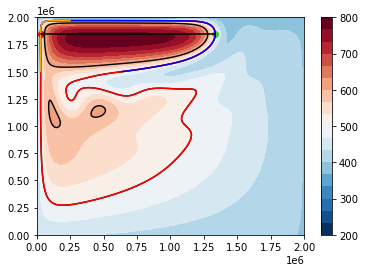

Converged zonal extension : 1304.4 km


In [5]:
vmin = 200 ; vmax = 800
dz=100./3.
N = (vmax-vmin)/dz
palette = plt.get_cmap('RdBu_r', N)

fig, ax = plt.subplots()
cf = ax.pcolormesh(gridx, gridy, data,
            vmin=vmin, vmax=vmax, alpha = 1.,
            # levels = levels,
            cmap = palette)
c1= ax.contour(glamt,gphit, data,
        levels = level,     # ligne bolded
        linewidths =1.4, colors=('k',),linestyles = "solid")
fig.colorbar(cf)

# collections of contours, as many as the number of levels
# get_extract each closed Path of a vgiven level
# The vertice of a Path is an array (x,y)

allcontours = c1.collections[0].get_paths()
for item in allcontours:
    vertices = item.vertices[item.vertices[:,1]>1.5e6,:]
    if len(vertices) > 0:
        break
ax.plot(item.vertices[:,0],item.vertices[:,1],c='red')

x = vertices[:,0] ; y = vertices[:,1]
ax.plot(x, y ,c='blue')

xN = x[x<0.25e6] ; yN = y[x<0.25e6]
ax.plot(xN,yN,c='orange')

tmp_S = np.argmax(x)
S = np.array([x[tmp_S],y[tmp_S]])
ax.scatter(S[0],S[1],c='limegreen')

tmp_N = np.argmin(np.abs(yN - S[1]))
N = np.array([xN[tmp_N],yN[tmp_N]])
ax.scatter(N[0],N[1],c='red')
ax.plot( [N[0],S[0]],[N[1],S[1]],c='black')

ax.set_xlim(0,2e6)
ax.set_ylim(0,2e6)
plt.show()

lC = S[0]-N[0]
print("Converged zonal extension : %.1f km" % (lC/1E3))

In [21]:
ListA = [[4 , 0. , dirt+"EXP_4_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [8 , 0. , dirt+"EXP_8_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [16 , 0. ,dirt+"EXP_16_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [32 , 0. ,dirt+"EXP_32_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [48 , 0. ,dirt+"EXP_48_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"]] 

ListB = [[4 , 10. , dirt+"EXP_4_ens_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [8 , 10. , dirt+"EXP_8_ens_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [16 , 10. ,dirt+"EXP_16_ens_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [32 , 10. ,dirt+"EXP_32_ens_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [48 , 10. ,dirt_omr+"EXP_48_ens_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"]] 

ListC = [[4 , 30. , dirt+"EXP_4_ens_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [8 , 30. , dirt+"EXP_8_ens_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [16 , 30. ,dirt+"EXP_16_ens_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [32 , 30. ,dirt+"EXP_32_ens_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [48 , 30. ,dirt+"EXP_48_ens_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"]] 

ListD = [[4 , 45. , dirt+"EXP_4_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [8 , 45. , dirt+"EXP_8_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [16 , 45. ,dirt+"EXP_16_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [32 , 45. ,dirt+"EXP_32_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [48 , 45. ,dirt+"EXP_48_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"]] 

ListD = [[4 , 45. , dirt+"EXP_4_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [8 , 45. , dirt+"EXP_8_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"], 
         [16 , 45. ,dirt+"EXP_16_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [32 , 45. ,dirt+"EXP_32_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [48 , 45. ,dirt+"EXP_48_ens_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"]]

List_ens = [ListA,ListB,ListC,ListD]


ListA = [[4 , 0. ,  dirt    +"EXP_4_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [8 , 0. ,  dirt    +"EXP_8_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [16 , 0. , dirt    +"EXP_16_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [32 , 0. , dirt_omr+"EXP_32_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [48 , 0. , dirt_omr+"EXP_48_een_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc"]]

ListB = [[4 , 10. , dirt+"EXP_4_een_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [8 , 10. , dirt+"EXP_8_een_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [16 , 10. ,  dirt_omr+"EXP_16_een_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [32 , 10. ,  dirt_omr+"EXP_32_een_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [48 , 10. , dirt_omr+"EXP_48_een_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc"]]

ListC = [[4 , 30. , dirt+"EXP_4_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [8 , 30. , dirt+"EXP_8_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"],
         [16 , 30., dirt+"EXP_16_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [32 , 30. , dirt_omr+"EXP_32_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [48 , 30. , dirt_omr+"EXP_48_een_fs30_rot/AM98_1m_00010101_00251230_grid_T.nc"]]

ListD = [[4 , 45. , dirt+"EXP_4_een_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],  
         [8 , 45. , dirt+"EXP_8_een_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [16 , 45. , dirt+"EXP_16_een_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [32 , 45. , dirt_omr+"EXP_32_een_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"],
        [48 , 45. , dirt_omr+"EXP_48_een_fs45_rot/AM98_1m_00010101_00251230_grid_T.nc"]]

List_een = [ListA,ListB,ListC,ListD]

List_run = np.array((List_ens,List_een))
level = [500]

In [22]:
np.shape(List_run)

(2, 4, 5, 3)

In [23]:
listRes = [100e3/4,100e3/8,100e3/16,100e3/32]
listtick= ["1/4°","1/8°","1/16°","1/32°"]
ListName = ["0° ENS", "10° ENS", "30° ENS", "45° ENS"]
ListName = ["0° EEN", "10° EEN", "30° EEN", "45° EEN"]
level = [500]

In [10]:
listL = np.nan*np.zeros((2,4,5)) # ENS/EEN, 4 orientations, 5 resolutions                
listM = np.copy(listL)

for vor in range(2):
    for angle in range(4): 
        for res in range(5):
            _,_,pdt = List_run[vor,angle,res]
            # reading
            dt = nc4.Dataset(pdt)
            print("... dataframe : %s" % (pdt))
            # data
            glamt = dt.variables['nav_lon'][:] ; gphit = dt.variables['nav_lat'][:]
            ssh = dt.variables['sshmeaned'][-nmean:,:,:].copy() +500.
            data = np.mean(ssh[:,:,:], axis=0) 
            dt.close()
            # contour 
            cs= plt.contour(glamt,gphit, data,levels = level)
            plt.close()

            for j in range(len(level)):
                allcontours = cs.collections[j].get_paths()
                for item in allcontours:
                    vertices = item.vertices[item.vertices[:,1]>1.5e6,:]
                    if len(vertices) > 0:
                        break

                vertices = item.vertices[item.vertices[:,1]>1.5e6,:]

                x = vertices[:,0] ; y = vertices[:,1]
                tmp_S = np.argmax(x)
                S = np.array([x[tmp_S],y[tmp_S]])

                xN = x[x<0.25e6] ; yN = y[x<0.25e6]
                tmp_N = np.argmin(np.abs(yN - S[1]))
                N = np.array([xN[tmp_N],yN[tmp_N]])

                listL[vor,angle,res] = S[0]-N[0]
                listM[vor,angle,res] = np.max(data)
        

... dataframe : /gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/EXP_4_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc
... dataframe : /gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/EXP_8_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc
... dataframe : /gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/EXP_16_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc
... dataframe : /gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/EXP_32_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc
... dataframe : /gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/EXP_48_ens_fs0_rot/AM98_1m_00010101_00251230_grid_T.nc
... dataframe : /gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/article_AM98/EXP_4_ens_fs10_rot/AM98_1m_00010101_00251230_grid_T.nc
... dataframe : /gpfswork/rech/bho/ukd13rj/nemo/dev_r12527_Gurvan_ShallowWater/cfgs/articl


saving : figure3_comparison.jpg
figure closed


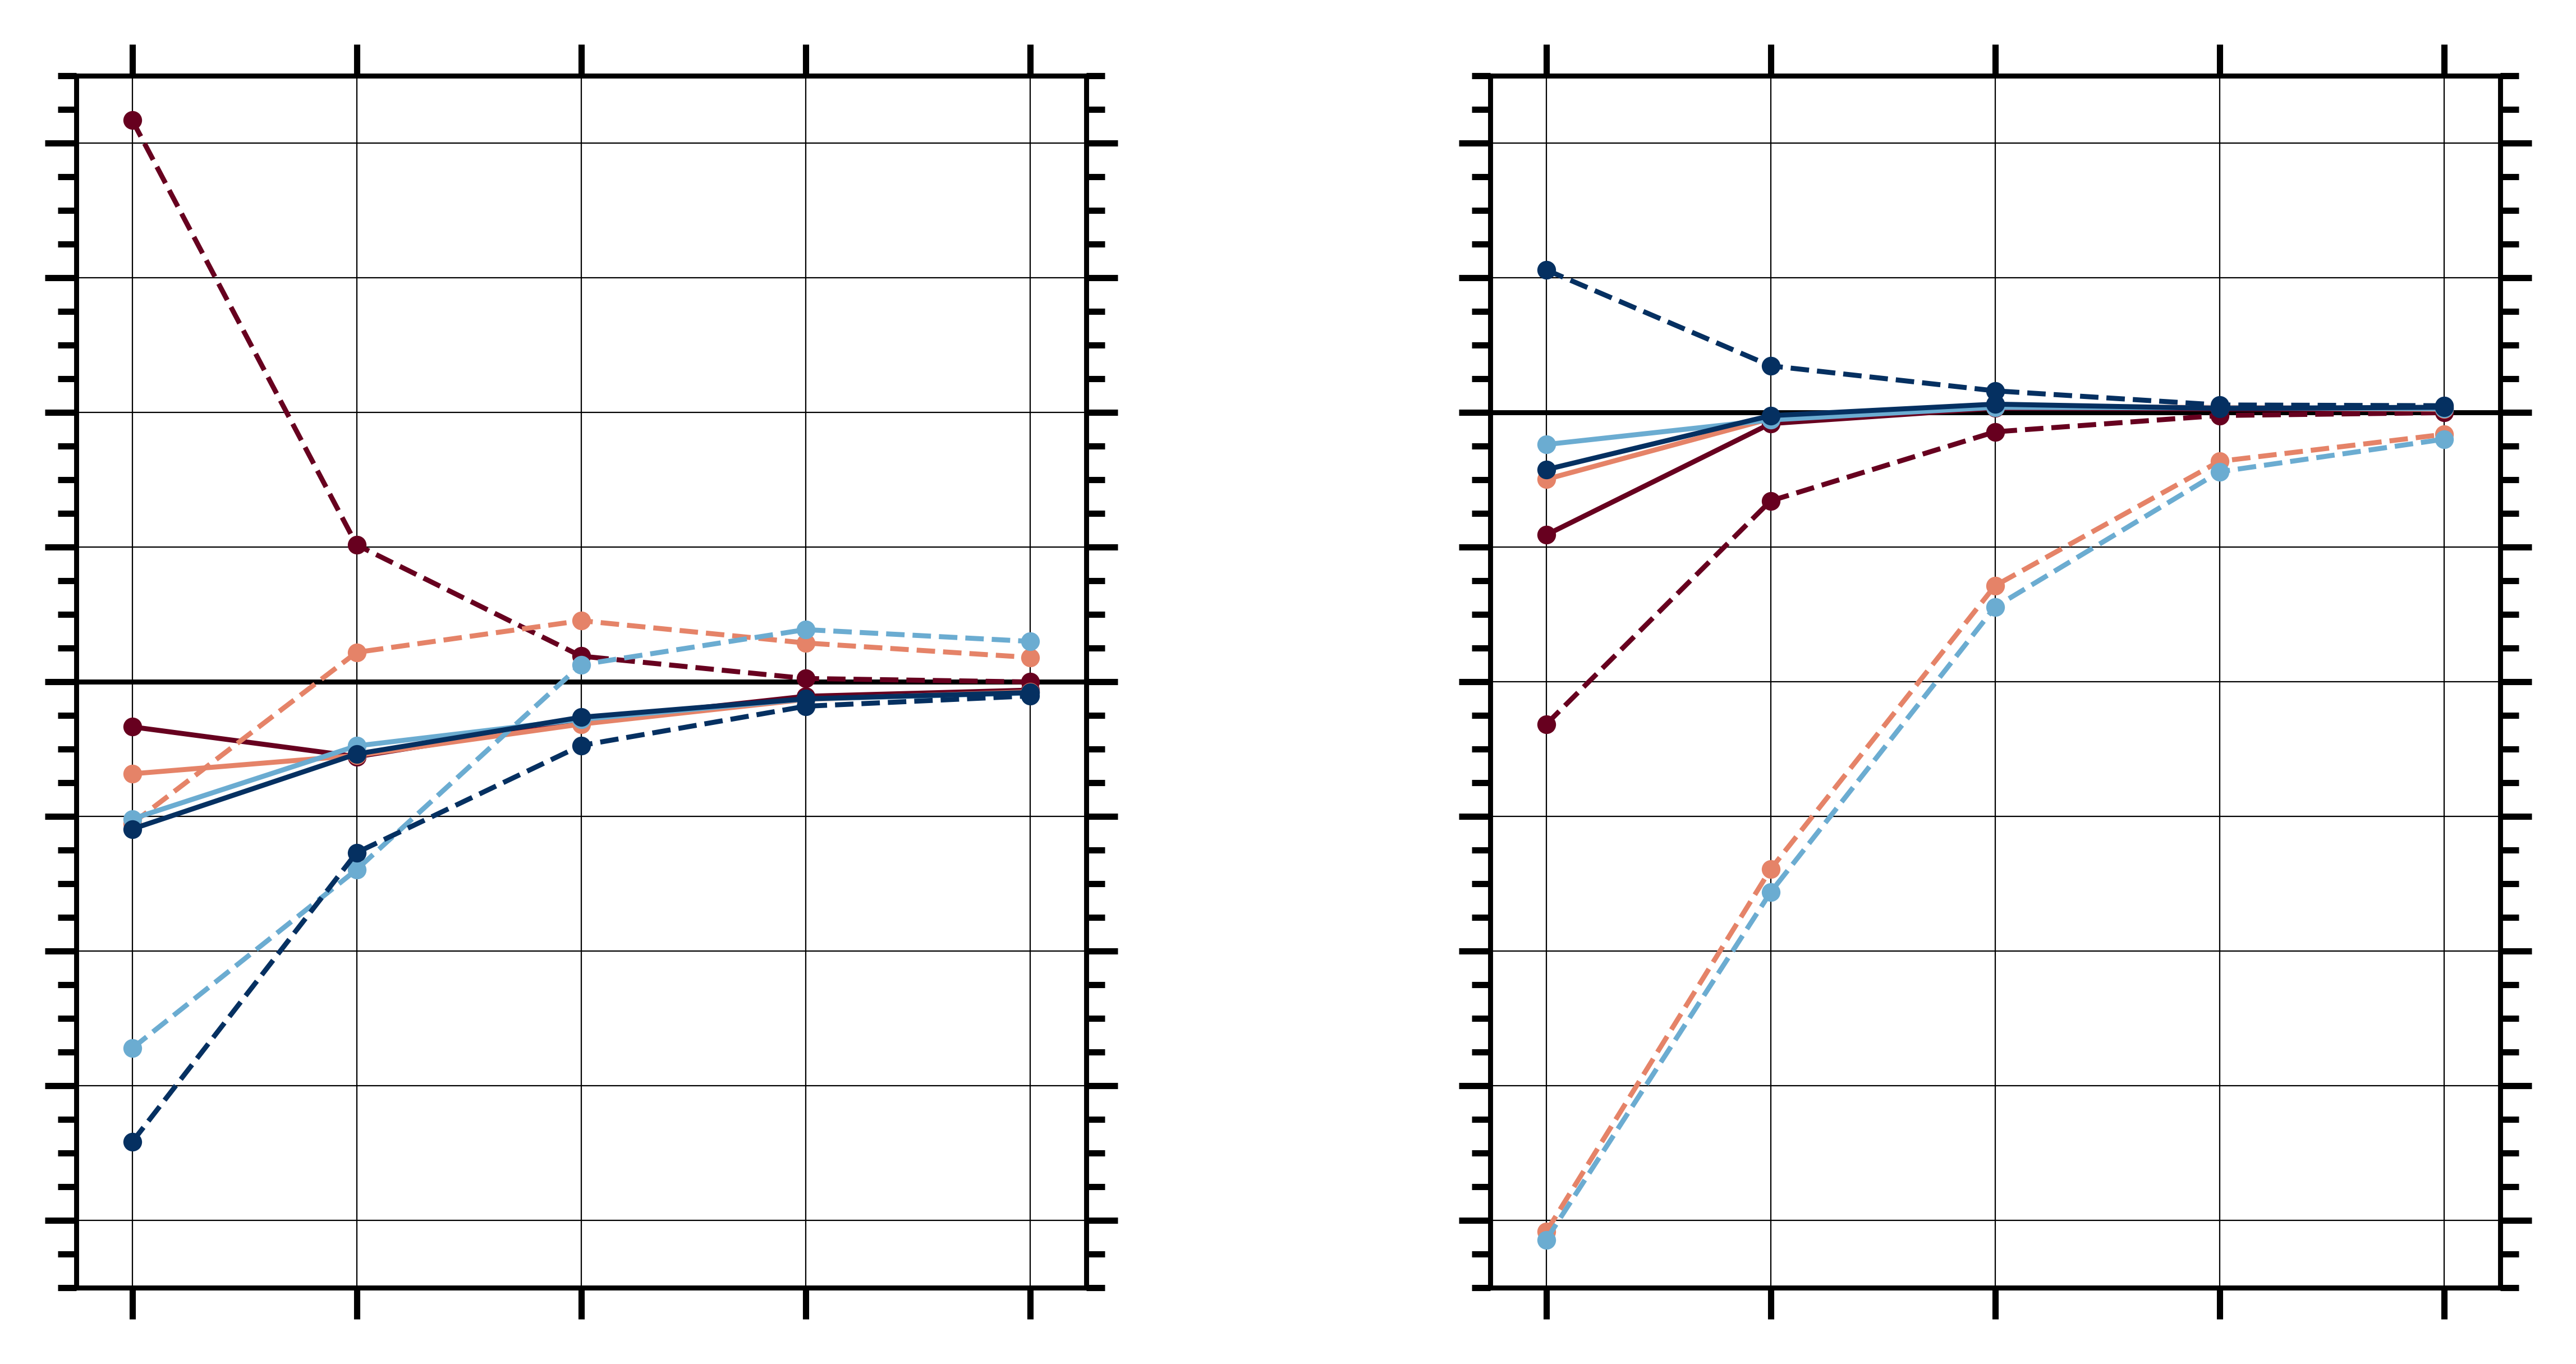

In [11]:
listRes = [100e3/4,100e3/8,100e3/16,100e3/32,100e3/48]
listtick= ["1/4°","1/8°","1/16°","1/32°","1/48°"]

colors = ["#053061","#6bacd1","#e58368","#67001f"][::-1]
kwargs = {"linewidth" : 0.8, "markersize" : 3, "markeredgewidth" : 0}
# "markerfacecolor" : 'none'


save = 1 ; dpi = 800
psave = "figure3_comparison.jpg"
fig, ax = plt.subplots(1, 2, figsize=(6,3),dpi=800, squeeze=False)

lC = listL[0,0,4]
lM = listM[0,0,4]

for angle in range(4): 
    ax[0,0].plot(listL[0,angle,:] - lC, marker = 'o', linestyle = "--", color=colors[angle], **kwargs)
    ax[0,0].plot(listL[1,angle,:] - lC, marker = 'o', linestyle = "-", color=colors[angle], **kwargs)

    ax[0,1].plot(listM[0,angle,:] - lM, marker = 'o', linestyle = "--", color=colors[angle], **kwargs)
    ax[0,1].plot(listM[1,angle,:] - lM, marker = 'o', linestyle = "-", color=colors[angle], **kwargs)

#ax[0,0].invert_xaxis()
#ax[0,0].set_yscale('log')
#ax[0,0].set_xscale('log')
#ax[0,0].set_xticks(listRes)

ticksy = np.arange(-400e3,500e3,100e3)
ax[0,0].set_ylim(-450e3,450e3)
ax[0,0].set_yticks(ticksy)
#ax[0,0].set_yticklabels(["%.0f" % (x/1e3) for x in ticksy])
ax[0,0].set_yticklabels([])
#ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(MultipleLocator(100e3/4))

ticksy = np.arange(-120,50,20)
ax[0,1].set_ylim(-130,50)
ax[0,1].set_yticks(ticksy)
#ax[0,1].set_yticklabels(["%.0f" % (x) for x in ticksy])
ax[0,1].set_yticklabels([])
#ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(MultipleLocator(20/4))

for vor in range(2):
    ax[0,vor].set_xticks(np.arange(5))
    #ax[0,vor].set_xticklabels(listtick)
    ax[0,vor].set_xticklabels([])
    
    ax[0,vor].grid(axis = 'both', which = "major", color='black', linestyle='-', linewidth=0.2)
    ax[0,vor].hlines(y=0,xmin=-0.25,xmax=4.25,     color='black', linestyle='-', linewidth=0.8)
    ax[0,vor].set_xlim(-0.25,4.25)
    
    ax[0,vor].tick_params(axis = "both", which = 'both', width=1., labelsize = 8, pad = 3, \
                        bottom = True, top = True, left = True, right = True)
    ax[0,vor].tick_params(which='minor',length = 3)
    ax[0,vor].tick_params(which='major',length = 5)
        
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, \
#                    wspace=0.4, hspace=0.08) # h is height of L1 (NJ) and w is width of L2 (NI)
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, \
                    wspace=0.4, hspace=0.08) # h is height of L1 (NJ) and w is width of L2 (NI)

if save :
    print("\nsaving : %s" % psave)
    fig.savefig(psave, dpi = dpi)
    print("figure closed")
plt.show()

In [17]:
"ENS 1/48° aligned intensity : %3.1fm" % (listM[0,0,-1])

'ENS 1/48° aligned intensity : 793.9m'

In [24]:
"ENS 1/48° aligned extension : %4.1fkm" % (listL[0,0,-1]/1e3)

'ENS 1/48° aligned extension : 1310.5km'

In [32]:
# ENS/EEN, 4 orientations, 5 resolutions           
(listL[0,-1,2] - listL[0,0,-1])/1e3

-47.15209452463034

In [13]:
np.arange(-400e3,400e3,100e3)

array([-400000., -300000., -200000., -100000.,       0.,  100000.,
        200000.,  300000.])

In [16]:
listL.dump("extension_zonale")

In [28]:
ticksy

array([-120, -100,  -80,  -60,  -40,  -20,    0,   20])

In [38]:
np.arange(-400e3,500e3,100e3)

array([-400000., -300000., -200000., -100000.,       0.,  100000.,
        200000.,  300000.,  400000.])